In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = pd.read_csv(r'..\Data\data_for_vis.csv')


# Visualizar as primeiras linhas
print(data.head())

# Limpeza de Dados (remoção de valores ausentes ou anômalos)
data = data.dropna()

# Normalização dos Dados
scaler = StandardScaler()
data[['vgs', 'ugs', 'adts']] = scaler.fit_transform(data[['vgs', 'ugs', 'adts']])

# Divisão dos Dados em treino e teste
X = data[['year', 'month', 'day', 'lat', 'lon', 'vgs', 'ugs']]
y = data['adts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados de treinamento e teste preparados.")


     year  month  day     lat      lon     vgs     ugs    adts
0  1993.0    1.0  1.0  34.125  127.625 -0.0256 -0.0160  0.5677
1  1993.0    1.0  1.0  34.125  127.875  0.0241 -0.0004  0.5649
2  1993.0    1.0  1.0  34.125  128.125  0.0721  0.0364  0.5734
3  1993.0    1.0  1.0  34.125  128.375  0.1105  0.0873  0.5841
4  1993.0    1.0  1.0  34.125  128.625  0.1525  0.1366  0.6017
Dados de treinamento e teste preparados.


C:\Users\pytho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


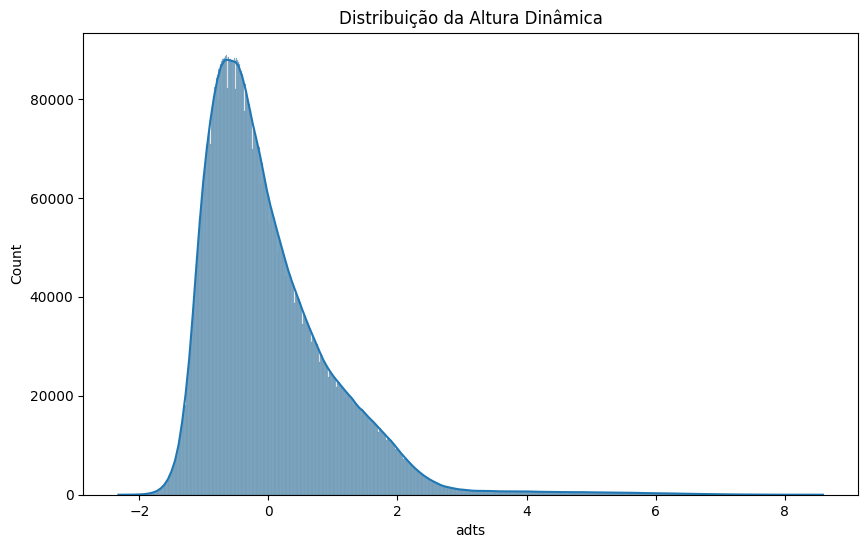

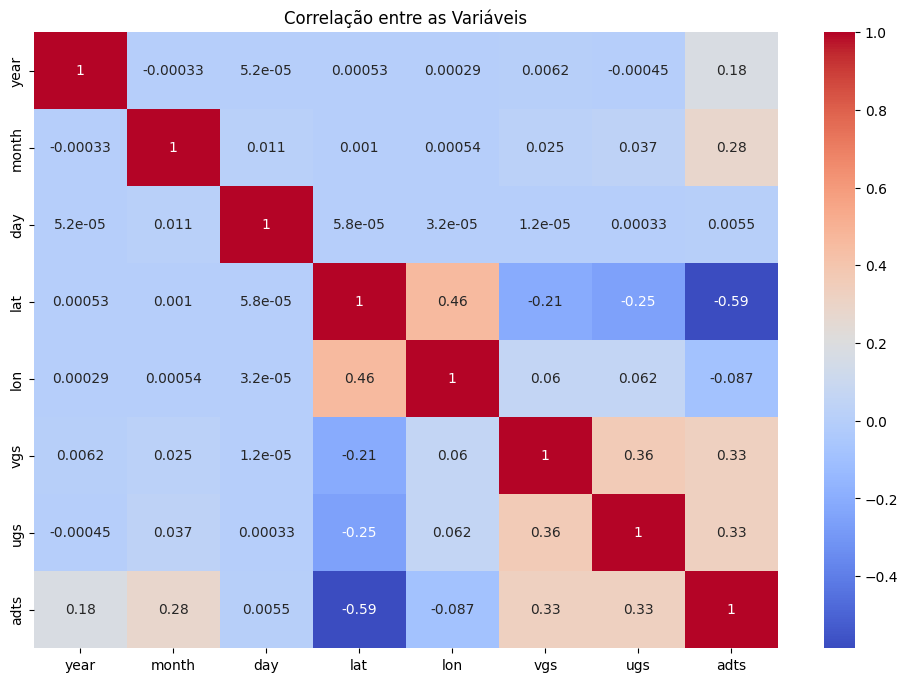

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar a distribuição da altura dinâmica
plt.figure(figsize=(10, 6))
sns.histplot(data['adts'], kde=True)
plt.title('Distribuição da Altura Dinâmica')
plt.show()

# Correlação entre as variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as Variáveis')
plt.show()


In [3]:
from pycaret.regression import *

# Inicializar o setup do PyCaret
regression_setup = setup(data=data, target='adts', session_id=123, normalize=True, 
                         ignore_features=['year', 'month', 'day', 'lat', 'lon'])


,Description,Value
0,Session id,123
1,Target,adts
2,Target type,Regression
3,Original data shape,"(17315474, 8)"
4,Transformed data shape,"(17315474, 3)"
5,Transformed train set shape,"(12120831, 3)"
6,Transformed test set shape,"(5194643, 3)"
7,Ignore features,5
8,Numeric features,2
9,Preprocess,True


In [4]:
# Comparar todos os modelos
best_model = compare_models()

# Verificar o melhor modelo
print(best_model)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:06:11
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ridge Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.6899,0.8446,0.9190,0.1552,0.4385,2.2385,6.1740
lasso,Lasso Regression,0.7448,0.9997,0.9999,-0.0000,0.5904,1.0000,4.4590


Processing:   0%|          | 0/81 [00:00<?, ?it/s]